### Machine Learning Implementation

In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset =  pd.read_csv("Preprocessed_dataset.csv")


In [3]:
dataset.head()

,Unnamed: 0,TEXT,label,Contains URL,Contains Monetary Characters,Classification
0,0,"go until jurong point, crazy.. available only ...",0,0,0,not spam
1,1,ok lar... joking wif u oni...\n,0,0,0,not spam
2,2,free entry in 2 a wkly comp to win fa cup fina...,1,1,1,spam
3,3,u dun say so early hor... u c already then say...,0,0,0,not spam
4,4,"nah i don't think he goes to usf, he lives aro...",0,0,0,not spam


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [5]:
vectorizer = TfidfVectorizer()

In [6]:
dx = dataset["TEXT"]
dy = dataset["Classification"]

In [7]:
X = vectorizer.fit_transform(dx)

In [8]:
y = dy

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X.toarray(), y, stratify = y, random_state = 42)

In [10]:
nb = GaussianNB()

In [11]:
nb.fit(X_train, y_train)

GaussianNB()

In [12]:
nb.score(X_test, y_test)

0.8794596466920679

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 

In [14]:
y_test

1622     not spam
5992     not spam
3261     not spam
10954    not spam
1498     not spam
           ...   
2429     not spam
344      not spam
4693     not spam
4336     not spam
742      not spam
Name: Classification, Length: 2887, dtype: object

In [15]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
nb.classes_

array(['not spam', 'spam'], dtype='<U8')

### Naive Bayes Classifier

In [17]:
from sklearn.naive_bayes import MultinomialNB 

In [18]:
mNB = MultinomialNB()

In [19]:
mNB.fit(X_train, y_train)

MultinomialNB()

In [20]:
mNB.score(X_test, y_test)

0.941808105299619

In [21]:
y_pred = mNB.predict(X_test)

In [22]:
cm = confusion_matrix(y_test, y_pred, labels = mNB.classes_)

In [23]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels= mNB.classes_)

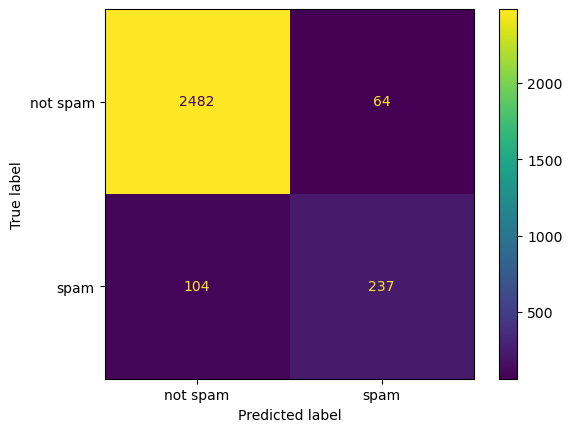

In [24]:
disp.plot()

In [25]:
from sklearn.metrics import accuracy_score , precision_score

In [26]:
accuracy = accuracy_score(y_test, y_pred)

In [27]:
accuracy

0.941808105299619

In [28]:
print(precision_score(y_test, y_pred, pos_label = "not spam"))

0.9597834493426141


In [29]:
print(precision_score(y_test, y_pred, pos_label = "spam"))

0.7873754152823921
